start
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008       

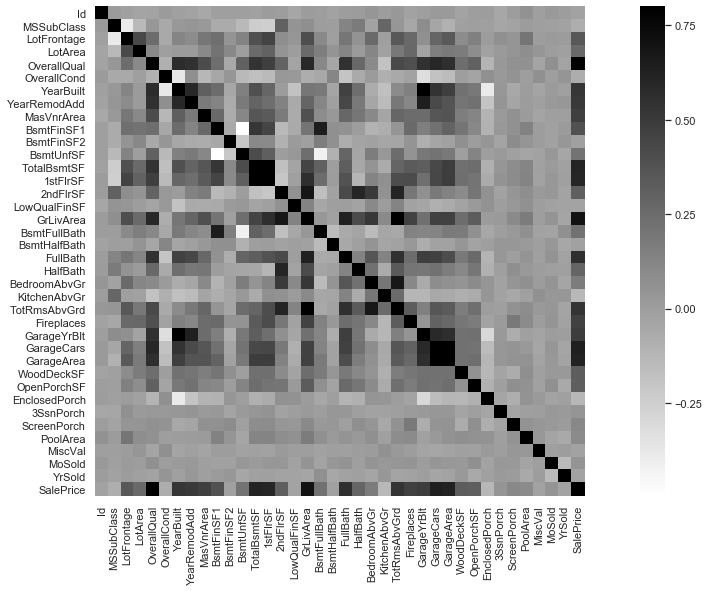

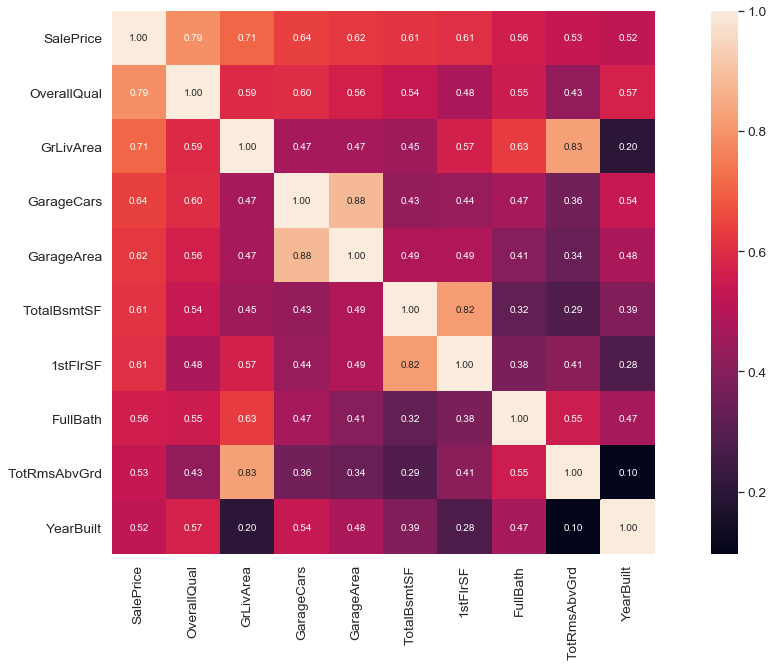

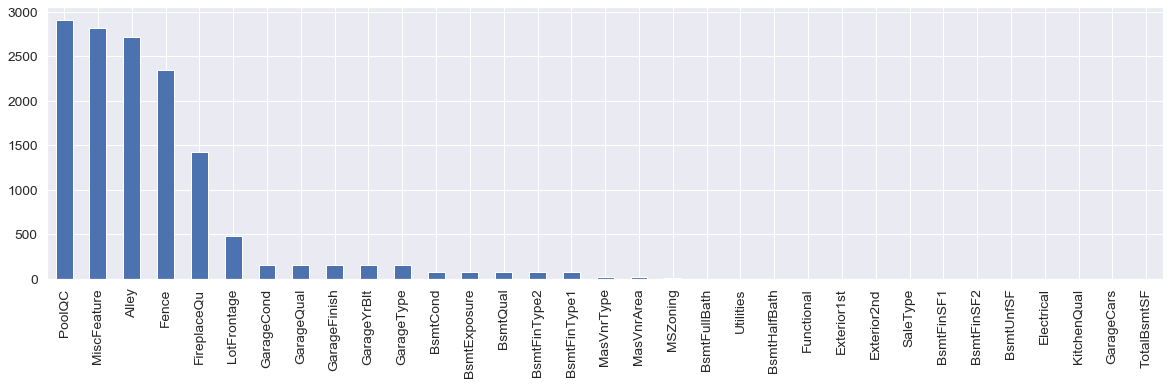

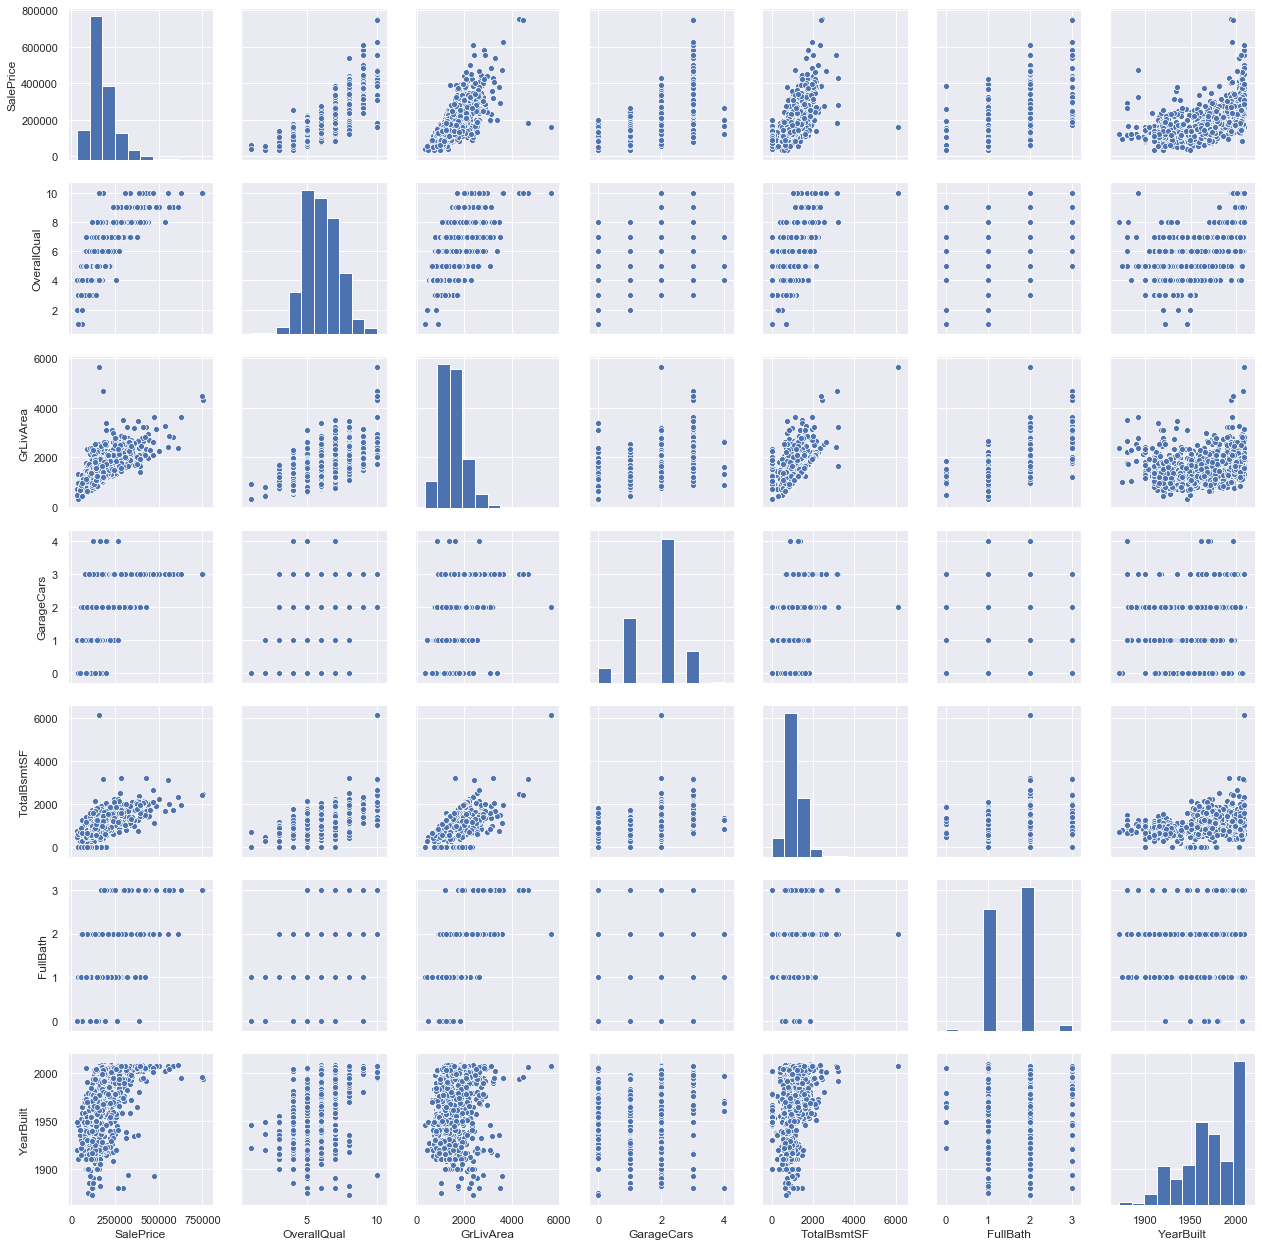

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


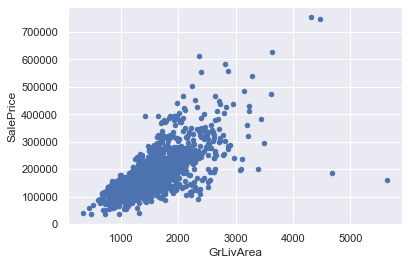

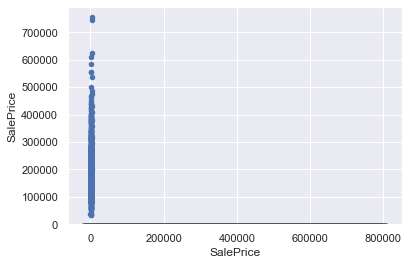

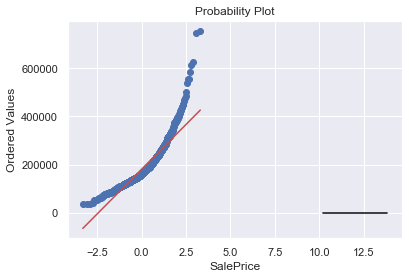

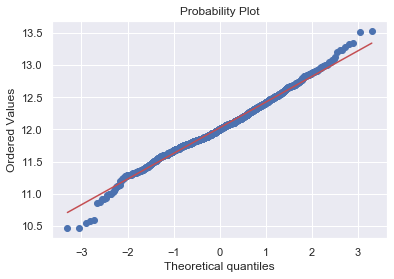

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
print("start")
# read data file
data_train = pd.read_csv(r'.\Data\train.csv')
data_test = pd.read_csv(r'.\Data\test.csv')
df_train_and_test = pd.concat([data_train.loc[:, 'MSSubClass': 'SaleCondition'], data_test.loc[:, 'MSSubClass': 'SaleCondition']], axis=0, ignore_index=True)
# print first 5 items in data file
print(data_train.head())
print(df_train_and_test.head())
# print abstract of field SalePrice
data_train['SalePrice'].describe()
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())
# select some field 
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True,cmap="binary")
# collect top 10 field
cols = corrmat.nlargest(n=10, columns='SalePrice').index
cm = np.corrcoef(data_train[cols].values.T)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
# drop field
df_train_and_test = df_train_and_test.drop('GarageArea', axis=1) 
df_train_and_test = df_train_and_test.drop('1stFlrSF', axis=1) 
df_train_and_test = df_train_and_test.drop('TotRmsAbvGrd', axis=1) 
# show missing data
missing = df_train_and_test.isnull().sum()
missing = missing[missing>0]
missing.sort_values(ascending=False, inplace=True)
missing_percent = df_train_and_test[missing.index].isnull().sum()/df_train_and_test[missing.index].isnull().count()
missing_types = df_train_and_test[missing.index]
missing_data = pd.concat([missing, missing_percent, missing_types.dtypes], axis=1, keys=['Total', 'Percent', 'Types'])
missing_data.sort_values(by='Total', ascending=False, inplace=True)
missing_data

missing.plot.bar(figsize=(20, 5))
missing_data.index.intersection(cols)
missing_data.loc[missing_data.index.intersection(cols)]

df_train_and_test = df_train_and_test.drop(missing_data[missing_data['Total']>1].index, axis=1)
df_train_and_test.isnull().sum().max()

df_train_and_test = df_train_and_test.fillna(df_train_and_test.mean())

df_train_and_test.isnull().sum()

df_train_and_test = pd.get_dummies(df_train_and_test, drop_first=True, dummy_na=True)

df_train_and_test.isnull().sum().max()

corrmat = df_train_and_test.corr()
droplist = []
n_col = len(corrmat.columns)
n_row = len(corrmat.index)
for i in range(n_col):
    for j in range(n_row):
        x = corrmat.iloc[j, i]
        idx = corrmat.index[j]
        cln = corrmat.columns[i]
        if np.abs(x) > 0.8 and idx != cln:
            print(idx, cln, x)
            droplist.append(idx)
            
df_train_and_test = df_train_and_test.drop(droplist, axis=1)
train_number = data_train.shape[0]
X = df_train_and_test[:train_number]
y = data_train['SalePrice']
test = df_train_and_test[train_number:]
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], size=2.5)
plt.show()

var = 'GrLivArea'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

data[data[var]>4500]
X = X.drop(data[data[var]>4500].index)
y = y.drop(data[data[var]>4500].index)

var = 'GrLivArea'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')


from scipy.stats import norm
import scipy.stats as stats
sns.distplot(y, fit=norm)
fig = plt.figure()
res = stats.probplot(y, plot=plt)

y = np.log(y)

from scipy.stats import norm
import scipy.stats as stats
sns.distplot(y, fit=norm)
fig = plt.figure()
res = stats.probplot(y, plot=plt)



